## Análise para uso de Bicicletas em Washinton D.C entre 2011 e 2012

### Ciclo de análise

1) Entendendo o proposta
2) Coleta de dados
3) Checagem de dados
4) Tratamento e tradução dos dados
5) Explorando os dados (Visualização)
6) Explorando os dados (Análise de correlação de variáveis)
7) Aplicando modelos de regressão linear
8) Conclusão

#### 1. Entendendo a proposta

##### 1.1 Proposta

O projeto tem como proposta realizar uma abordagem descritiva na coleta de dados realizada em sistemas de compartilhamento de bicicletas em Washinton D.C entre 2011 e 2012, onde foram coletadas informações com o propósito de relacionar fatores adiversos: datas (dias de semana, finais de semana e feriados), fatores climáticos (ventos, temperatura e umidade), estações e quantidade de bicicletas alugadas (entre casuais e registrados). Assim como encontrar correlações e o relacionamento entre os dados.

#### 2. Coleta de dados

##### 2.1 Origem do dataset

* Link para download do dataset: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
* Parte dos dados foi normalizada
* O dataset Contêm 17 colunas e 731 linhas

##### 2.2 Importação de dados e Instação e importação de pacotes necessários

Somente rodar se necessário, descomente a linha a baixo.

In [1]:
# %pip install locale
# %pip install statsmodels
# %pip install googletrans==4.0.0-rc1

Importação do Pandas, Numpy, Matplotlib, Seaborn e outros

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from googletrans import Translator # Precisa do pacote do pip install
import locale # Precisa do pacote do pip install
from matplotlib.ticker import FuncFormatter
from statsmodels.distributions.empirical_distribution import ECDF

Importando dados CSV como um dataframe Pandas

In [3]:
caminho = 'Data/Bike-day.csv'
df = pd.read_csv(caminho)

Mostrando os primeiros cinco registros

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Função shape para indicar o tamanho do dataset

In [5]:
df.shape

(731, 16)

##### 2.3 Informação do dataset

* instant - Índice do registro
* dteday - Data
* season - Estações do ano: 1 - Inverno, 2 - Primavera, 3 - Verão, 4 - Outono
* yr - ano, sendo 0, 2011 e 1, 2012
* mnth - meses do ano de 1 a 12 de acordo com sua posição
* holiday - feriado, sendo o dia um feriado ou não (Fonte: http://dchr.dc.gov/page/holiday-schedule)
* weekday - dia da semana de 0 a 6 de acordo com sua posição começando por domingo
* workingday - dia de trabalho: se o dia não for final de semana nem feriado então é 1, caso contrário, 0
* weathersit - situação climática: 1 limpo, 2 poucas nuvens, 3 parcialmente nublado
* temp - temperatura normalizada em Celsius
* atemp - sensação termica normalizada em Celsius
* hum - umidade normalizada
* windspeed - velocidade do vento normalizada
* casual - numero total de casuais no dia
* registered - numero total de registrados no dia
* cnt - numero total de bicicletas alugadas incluindo casuais e registrados

#### 3. Checagem de dados

* Verificação de valores nulos
* Verificação de valores duplicados
* Verificação dos tipos de dados
* Verificação de valores únicos de cada coluna
* Verificação das estatísticas do dataset

##### 3.1 Verificação de valores nulos

In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Não há valores nulos no dataset

##### 3.2 Verificação de valores duplicados

In [7]:
df.duplicated().sum()

0

Não há valores duplicados no dataset

##### 3.3 Verificação dos tipos de dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### 3.4 Verificação de valores únicos de cada coluna

In [9]:
df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

##### 3.5 Verificação das estatísticas do dataset

In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Considerações:
* Com exceção da coluna instant e das colunas casual, registered e cnt (estes últimos sendo dados quantitativos discretos), as médias são próximas entre si variando entre 0.02 e 6.5
* O desvio padrão também segue um característica semelhante, variando entre 0.16 e 3.45
* Os valores mínimos e máximos dos dados quantitativos contínuo estão próximos

#### 4. Tratamento e tradução dos dados

Função para realizar a tradução dos nomes das colunas

In [11]:
def traduzir_colunas(df, language='pt'):
    #Dicionario para as palavras que não foram traduzidas ou que foram traduzidas erroneamente 
    erro_ao_traduzir = {
        'dteday': 'Data',
        'mnth': 'Mês',
        'weathersit': 'Clima',
        'temp': 'Temperatura',
        'hum': 'Umidade',
        'windspeed': 'Velocidade do Vento',
        'registered': 'Registrados',
        'cnt': 'Total_Bikes',
        'atemp': 'Sensação térmica'
    }
    
    # Renomear as colunas
    traducoes = {}
    tradutor = Translator()
    for coluna in df.columns:
        try:
            if coluna in erro_ao_traduzir:
                traducoes[coluna] = erro_ao_traduzir[coluna] # Utilize a tradução personalizada
            else:
                traduzido = tradutor.translate(coluna, src='en', dest=language) # Tradução acontece aqui
                if traduzido and traduzido.text:
                    capslock = traduzido.text.capitalize() # Maiúscula na primeira letra de cada palavra

                    traducoes[coluna] = capslock
                else:
                    print(f"Erro ao traduzir a coluna '{coluna}': tradução retornou None ou texto vazio")
                    traducoes[coluna] = coluna # Manter o nome original em caso de erro
        except Exception as a:
            print(f"Erro ao traduzir a coluna '{coluna}': {a}")
            traducoes[coluna] = coluna # Manter o nome original em caso de erro

    df.columns = [traducoes.get(col, col) for col in df.columns]

Executa função de tradução

In [12]:
df_traduzido = df.copy()
traduzir_colunas(df_traduzido)
df_traduzido.head()

,Instante,Data,Temporada,Ano,Mês,Feriado,Dia da semana,Dia de trabalho,Clima,Temperatura,Sensação térmica,Umidade,Velocidade do Vento,Casual,Registrados,Total_Bikes
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Remove o indexador da planilha

In [13]:
df_traduzido = df_traduzido.drop(columns=['Instante'])
df_traduzido.head()

,Data,Temporada,Ano,Mês,Feriado,Dia da semana,Dia de trabalho,Clima,Temperatura,Sensação térmica,Umidade,Velocidade do Vento,Casual,Registrados,Total_Bikes
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Renomeando valores numéricos para estações do ano (season : season (1:winter, 2:spring, 3:summer, 4:fall)) e Ano  (yr : year (0: 2011, 1:2012))

In [14]:
if 'Temporada' in df_traduzido.columns:
        df_traduzido['Temporada'] = df_traduzido['Temporada'].replace({1: 'Inverno', 2: 'Primavera', 3: 'Verão', 4: 'Outono'})

if 'Ano' in df_traduzido.columns:
        df_traduzido['Ano'] = df_traduzido['Ano'].replace({0: '2011', 1: '2012'})
df_traduzido.head()

,Data,Temporada,Ano,Mês,Feriado,Dia da semana,Dia de trabalho,Clima,Temperatura,Sensação térmica,Umidade,Velocidade do Vento,Casual,Registrados,Total_Bikes
0,2011-01-01,Inverno,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Inverno,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Inverno,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Inverno,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Inverno,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 5. Explorando os dados (Visualização)

##### 5.1 Registrados X Casuais

##### 5.1.1 Comparando Registrados x Casuais

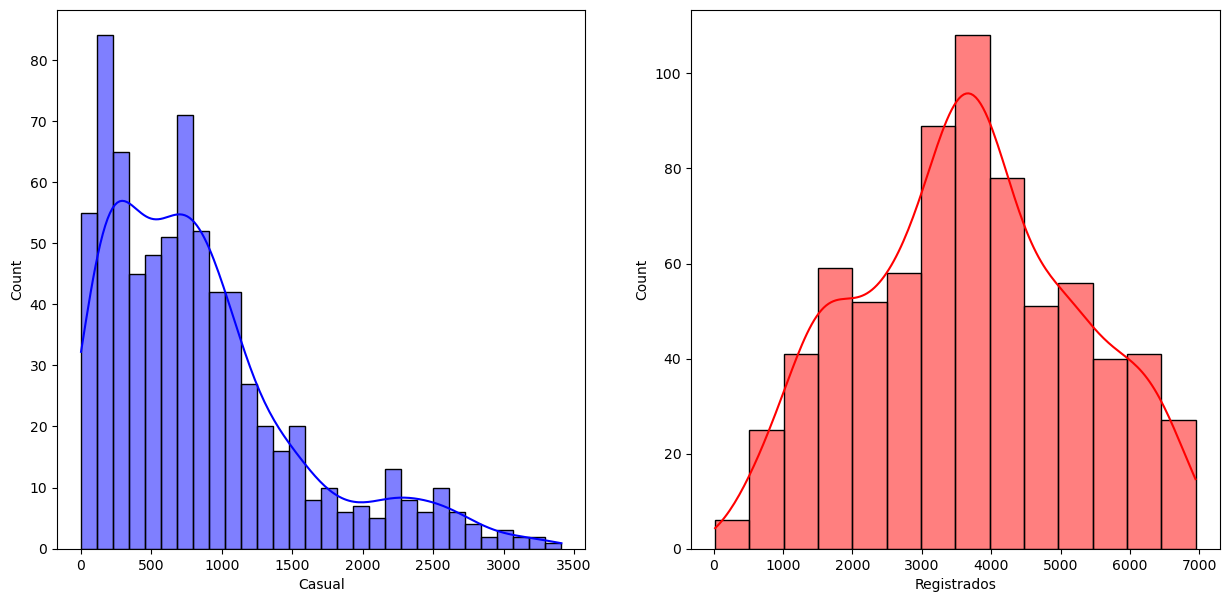

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_traduzido,x='Casual',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df_traduzido,x='Registrados',kde=True,color='red')
plt.show()

Considerações:
* Os usuários registrados tendem a usar as bicicletas alugadas com maior frequência

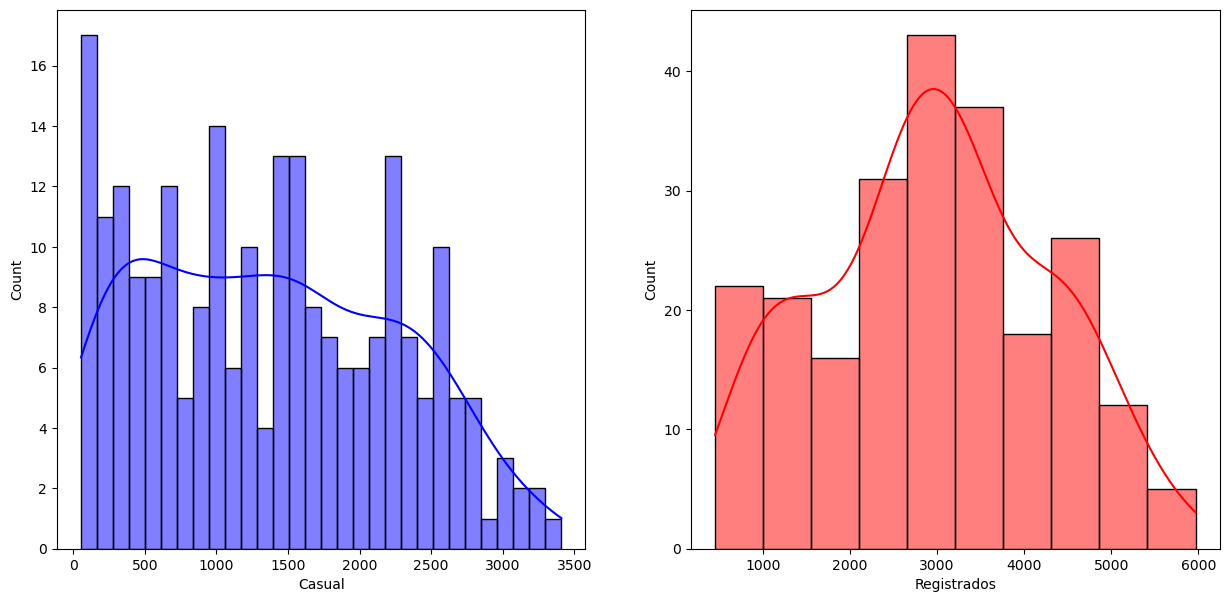

In [16]:
df_traduzido_com_feriado = df_traduzido[df_traduzido ['Dia de trabalho'] == 0]
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_traduzido_com_feriado,x='Casual',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=df_traduzido_com_feriado,x='Registrados',kde=True,color='red')
plt.show()

Considerações:
* Existe um número maior de usuários casuais em finais de semana e feriados, enquanto que os registrados tendem a manter a mesma frequencia

##### 5.1.2 Impacto das Condições Climáticas (Clima, Temperatura, Umidade, Velocidade do Vento)

Gráfico de dispersão com regressão e intervalo de confiança

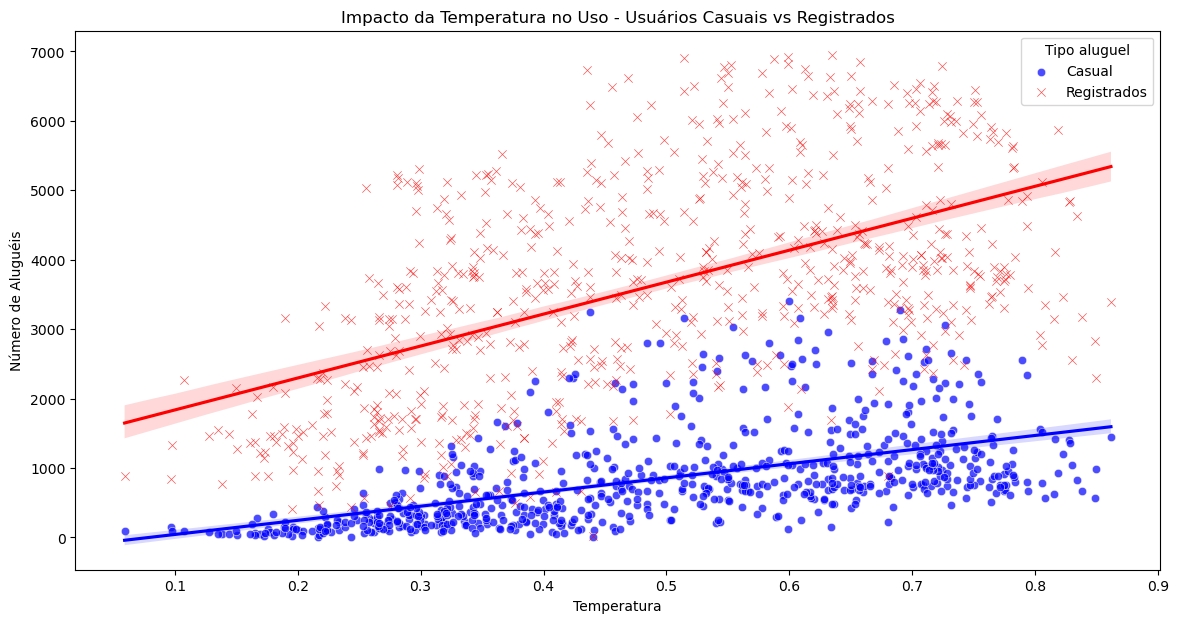

In [17]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Verificando apenas em dias de trabalho

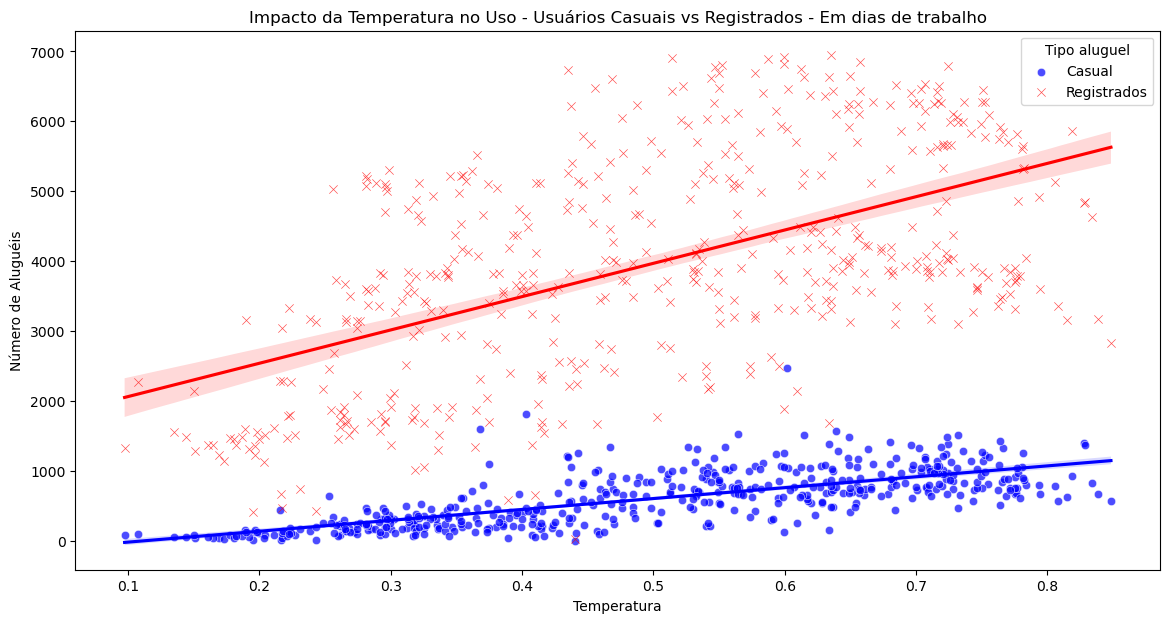

In [18]:
df_traduzido_sem_feriado = df_traduzido[df_traduzido ['Dia de trabalho'] != 0]
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados - Em dias de trabalho')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Verificando com feriados/finais de semana

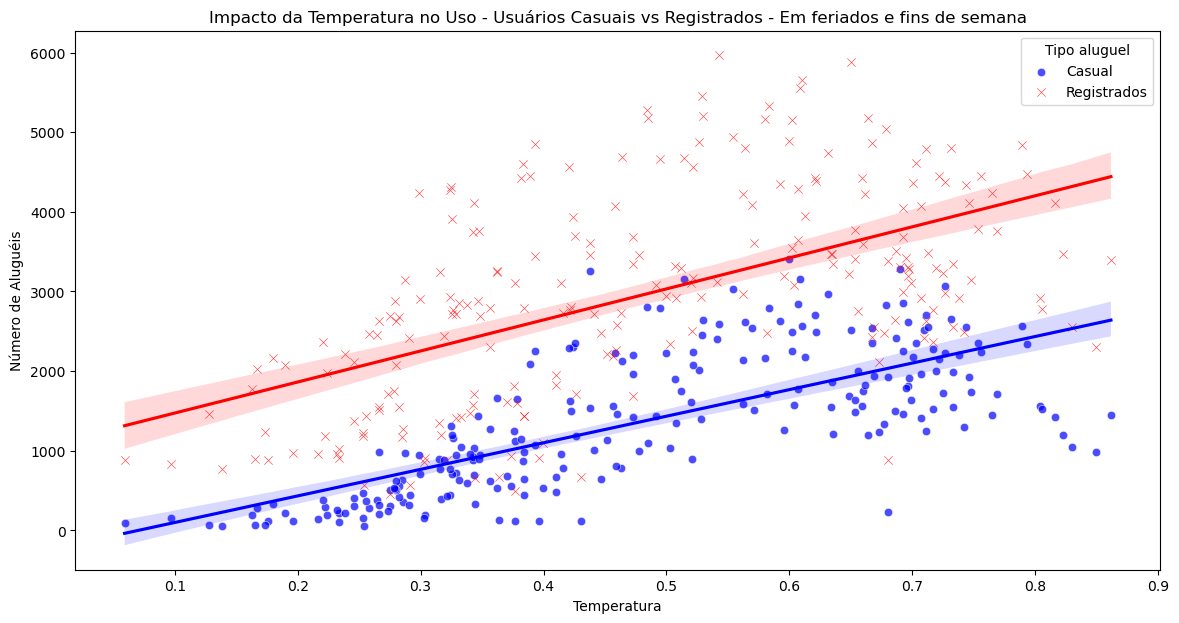

In [19]:
df_traduzido_com_feriado = df_traduzido[df_traduzido ['Dia de trabalho'] == 0]
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido_com_feriado, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido_com_feriado, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido_com_feriado, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido_com_feriado, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados - Em feriados e fins de semana')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Considerações:
* Embora não seja uma variável que diretamente se relaciona com a quantidade de aluguéis, tanto no casual quanto no registrado existe uma tendência entre temperatura e número de aluguéis, tanto em feriados/fins de semana quanto em dias de trabalho normais

Verificando a influência da umidade no número de aluguéis

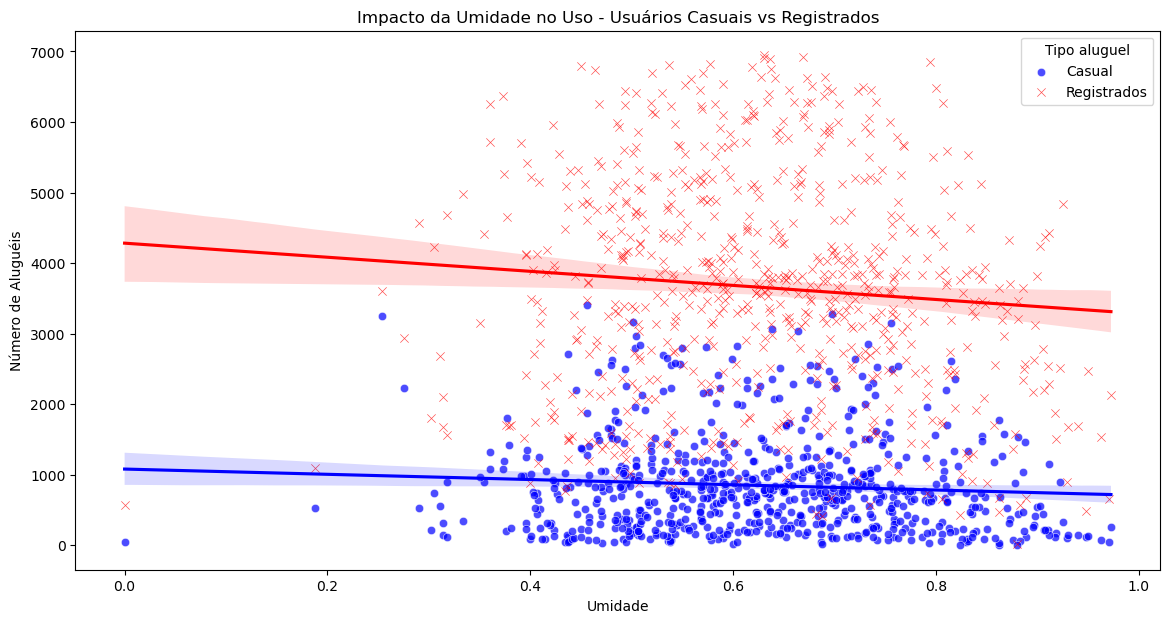

In [20]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Umidade', y='Casual', color='blue', alpha=0.7, label='Casual')
sns.scatterplot(data=df_traduzido, x='Umidade', y='Registrados',color='red', alpha=0.7, marker='x', label='Registrados')
sns.regplot(data=df_traduzido, x='Umidade', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Umidade', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Umidade no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Umidade')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Considerações:
* Aparentemente não relação entre a umidade e o número de aluguéis tanto para casuais como para registrados

Verificando a influência da velocidade do vento no número de aluguéis

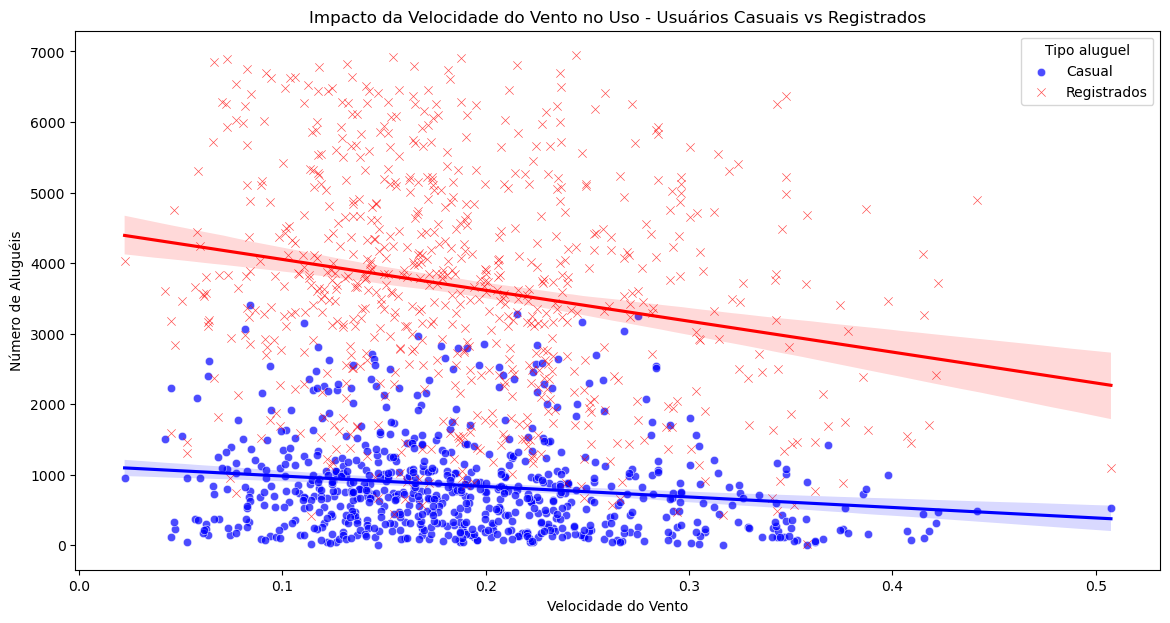

In [21]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Velocidade do Vento', y='Casual', color='blue', alpha=0.7, label='Casual')
sns.scatterplot(data=df_traduzido, x='Velocidade do Vento', y='Registrados',color='red', alpha=0.7, marker='x', label='Registrados')
sns.regplot(data=df_traduzido, x='Velocidade do Vento', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Velocidade do Vento', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Velocidade do Vento no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Velocidade do Vento')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Tipo aluguel')
plt.show()

Considerações:
* Aparentemente não relação entre a umidade e o número de aluguéis tanto para casuais como para registrados

##### 5.2 Relação Temporada x aluguel

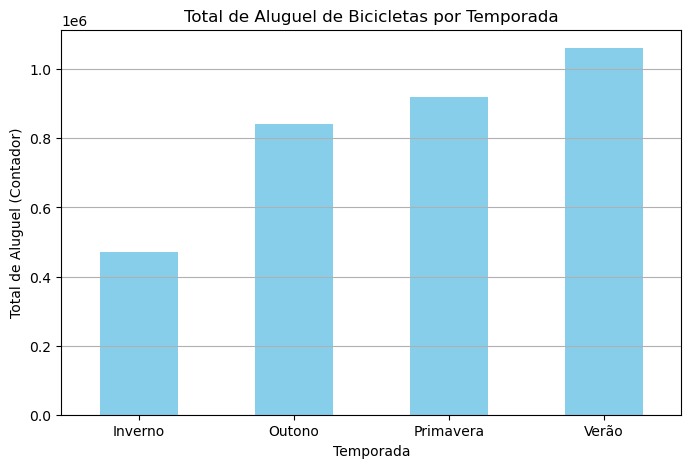

In [22]:
contador_temporada_X_Aluguel = df_traduzido.groupby('Temporada')['Total_Bikes'].sum()

plt.figure(figsize=(8, 5))
contador_temporada_X_Aluguel.plot(kind='bar', color='skyblue')
plt.title('Total de Aluguel de Bicicletas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de Aluguel (Contador)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Elencando as temporadas por número de alugueis totais

In [23]:
top_temporadas = contador_temporada_X_Aluguel.sort_values(ascending=False).head(4)
for i, (temporada, total) in enumerate(top_temporadas.items(), start=1):
    print(f'Top {i}: {temporada} com {total} aluguéis')

Top 1: Verão com 1061129 aluguéis
Top 2: Primavera com 918589 aluguéis
Top 3: Outono com 841613 aluguéis
Top 4: Inverno com 471348 aluguéis


Considerações:
* Estações mais quentes tem um número maior de bicicletas alugadas

##### 5.2.1 Relação Mês x aluguel

formatação personalizada que formata os valores numéricos de acordo com a configuração de localidade especificada mas está presente para compatibilidade com a interface esperada pelo "FuncFormatter"

In [24]:
def format_func(value, tick_number):
    return locale.format_string('%.0f', value, grouping=True)

Total

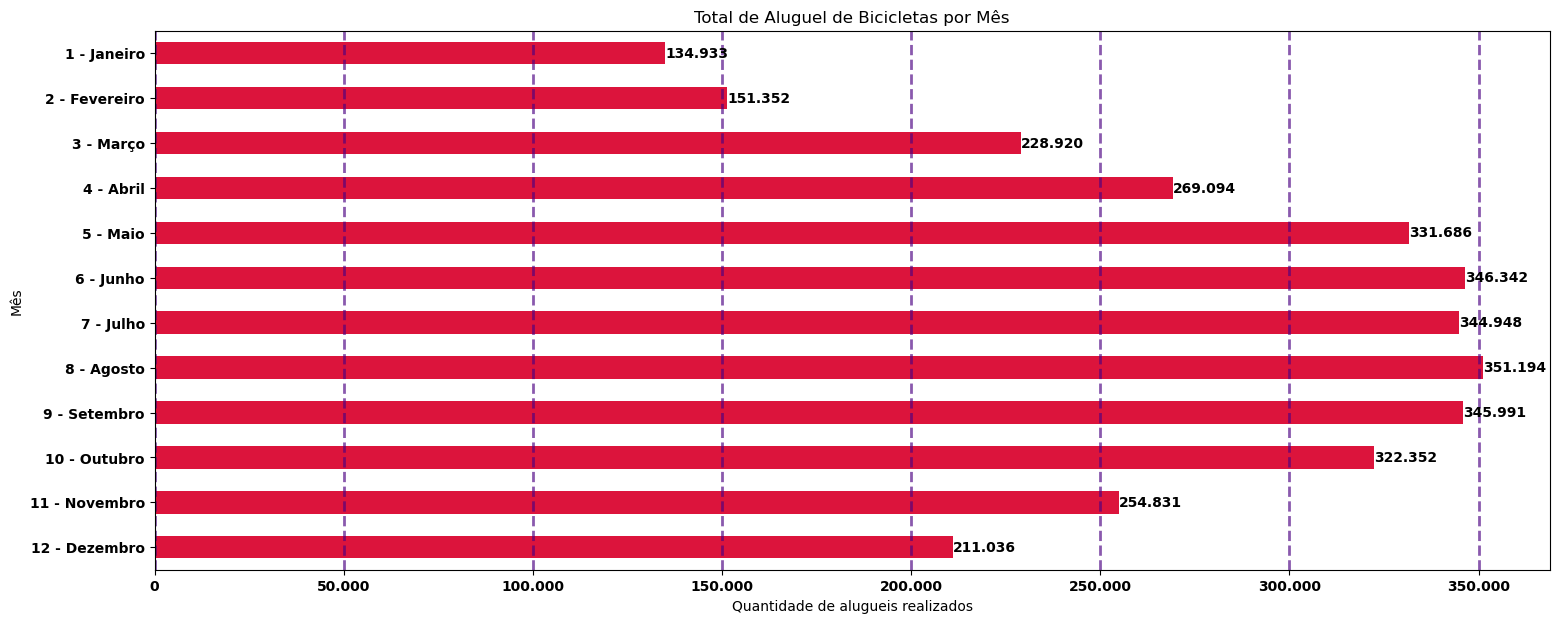

In [25]:
locale.setlocale(locale.LC_ALL, 'de_DE.UTF-8')
formatter = FuncFormatter(format_func)

BikesPorMes = df_traduzido.groupby('Mês')['Total_Bikes'].sum()
months_dict = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
y_labels = [f'{month_num} - {months_dict[month_num]}' for month_num in BikesPorMes.index]


plt.figure(figsize=(18, 7))
BikesPorMes.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Mês')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Mês')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.yticks(ticks=range(len(BikesPorMes)), labels=y_labels, weight='bold')
plt.gca().xaxis.set_major_formatter(formatter)


for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

for index, value in enumerate(BikesPorMes):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()

2011

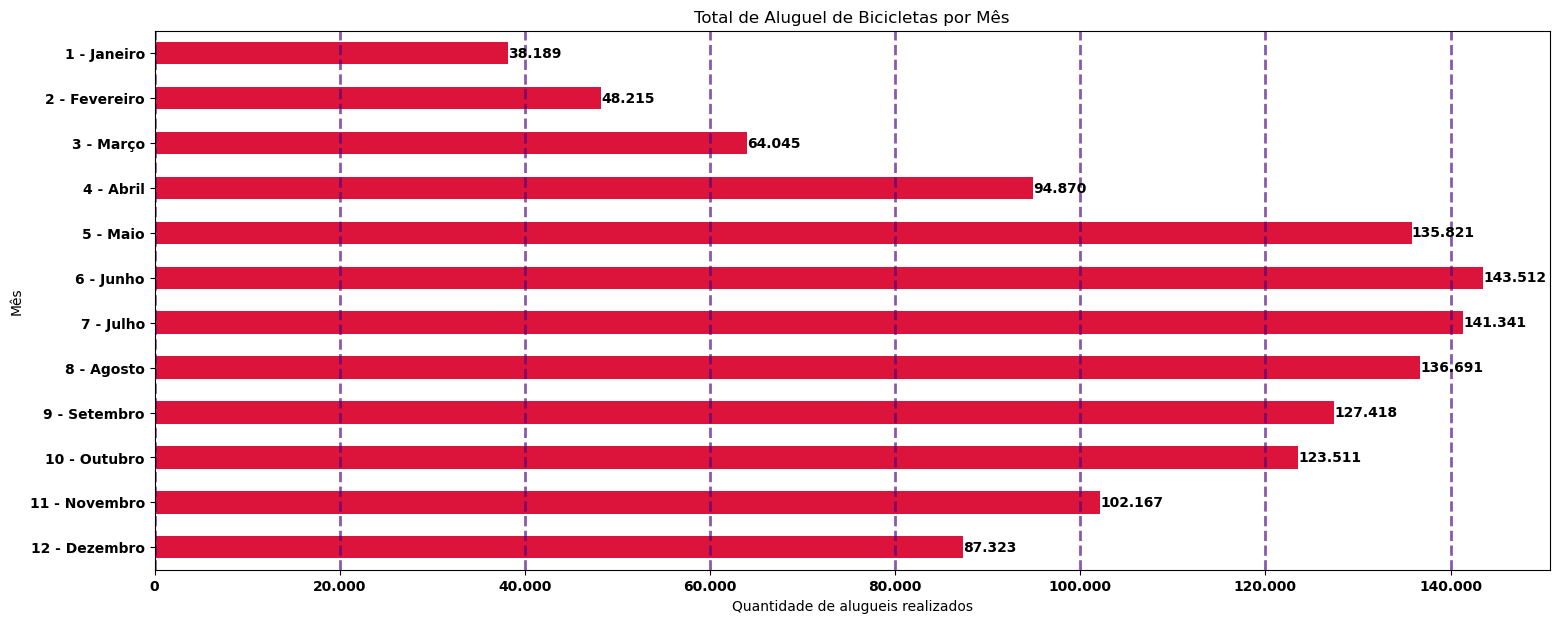

In [26]:
BikesPorMes2011 = df_traduzido[df_traduzido['Ano'] == '2011'].groupby('Mês')['Total_Bikes'].sum()
months_dict = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
y_labels = [f'{month_num} - {months_dict[month_num]}' for month_num in BikesPorMes2011.index]


plt.figure(figsize=(18, 7))
BikesPorMes2011.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Mês')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Mês')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.yticks(ticks=range(len(BikesPorMes2011)), labels=y_labels, weight='bold')
plt.gca().xaxis.set_major_formatter(formatter)


for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

for index, value in enumerate(BikesPorMes2011):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()

2012

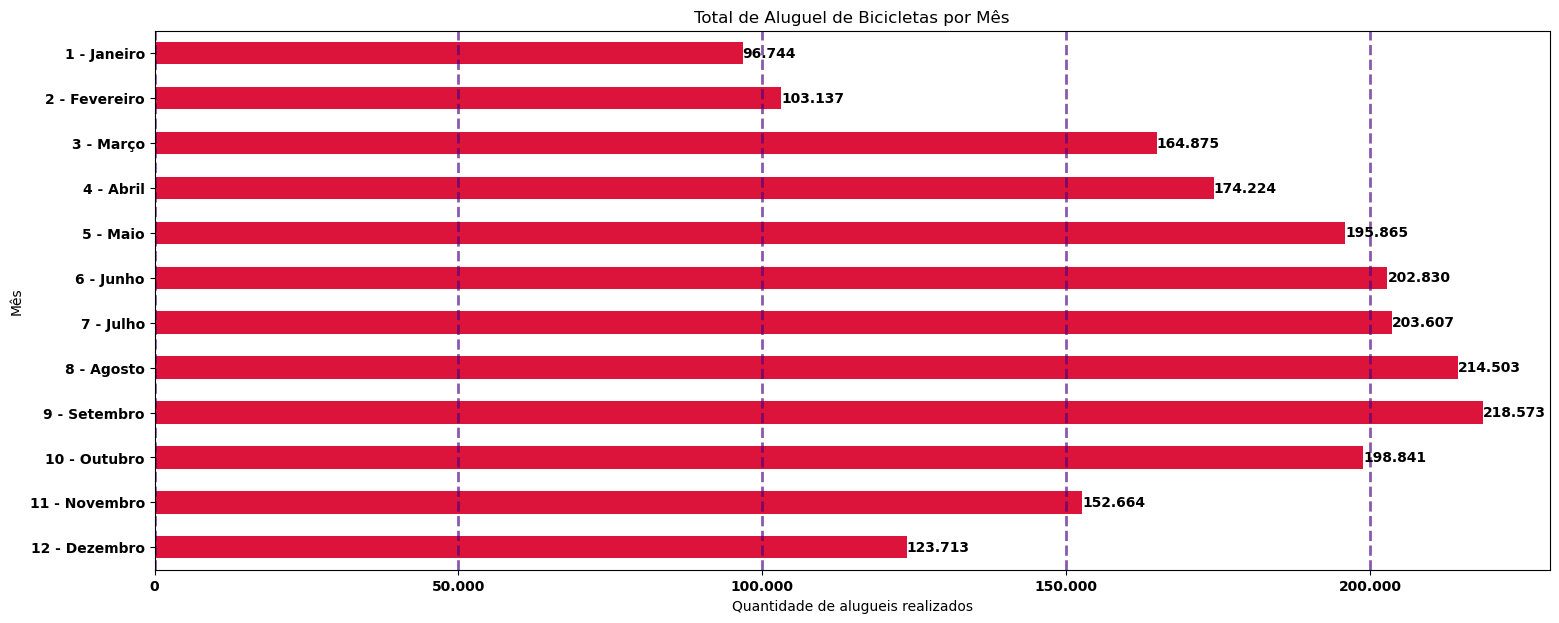

In [27]:
BikesPorMes2012 = df_traduzido[df_traduzido['Ano'] == '2012'].groupby('Mês')['Total_Bikes'].sum()
months_dict = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
y_labels = [f'{month_num} - {months_dict[month_num]}' for month_num in BikesPorMes2012.index]


plt.figure(figsize=(18, 7))
BikesPorMes2012.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Mês')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Mês')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.yticks(ticks=range(len(BikesPorMes2012)), labels=y_labels, weight='bold')
plt.gca().xaxis.set_major_formatter(formatter)


for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

for index, value in enumerate(BikesPorMes2012):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()

Relação Bikes x Ano

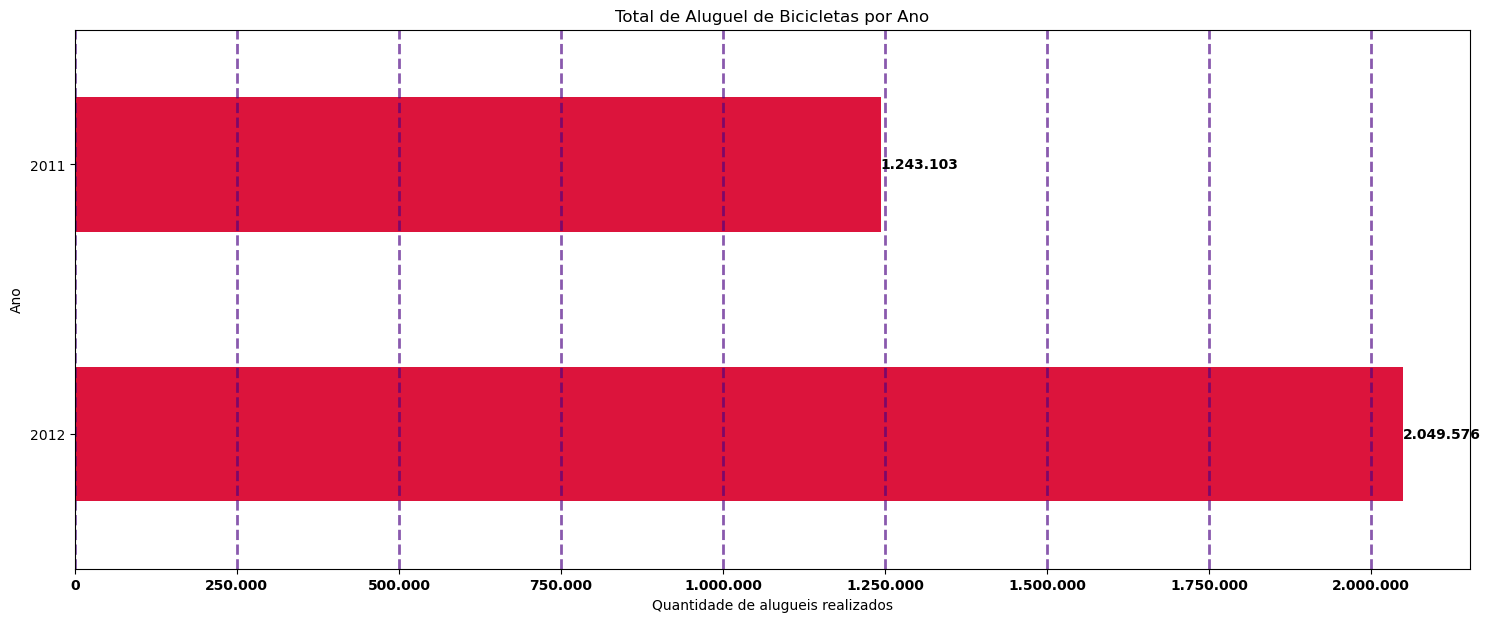

In [28]:
BikesPorAno = df_traduzido.groupby('Ano')['Total_Bikes'].sum()

plt.figure(figsize=(18, 7))
BikesPorAno.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Ano')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Ano')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

# Make the x-tick labels bold
for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

# Annotate each bar with the value
for index, value in enumerate(BikesPorAno):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()

Considerações:
* Os meses de Maio a Outubro apresentam maior número de aluguéis, em ambos os anos

##### 5.2.2 Relação Temperatura x Aluguel ECDF

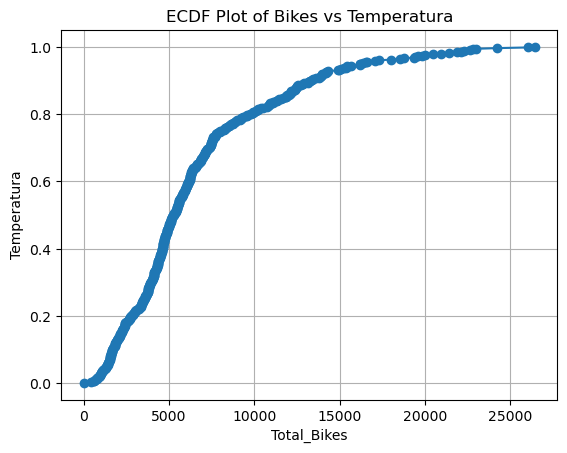

In [29]:
bikes = df_traduzido.groupby('Mês')['Total_Bikes'].sum()
TemperaturaPorMes = df_traduzido.groupby('Mês')['Temperatura'].mean()
BikesPorTemperatura = df_traduzido.groupby('Temperatura')['Total_Bikes'].sum()
ecdf = ECDF(BikesPorTemperatura)

# Plot the ECDF
plt.plot(ecdf.x, ecdf.y, marker='o', linestyle='-')
plt.xlabel('Total_Bikes')
plt.ylabel('Temperatura')
plt.title('ECDF Plot of Bikes vs Temperatura')
plt.grid(True)
plt.show()


Considerações:
* Embora não seja uma tendência acentuada, existe sim uma tendência que mostra que quanto maior a temperatura, maior o uso de aluguéis de bicicletas

#### 6. Explorando os dados (Análise de correlação de variáveis)

##### 6.1 Verificando correlação entre variáveis

Transformando os dados nominais da temporada em valores numéricos

In [30]:
df_corr = df_traduzido
df_corr['Temporada'] = df_corr['Temporada'].replace({'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4})

Aplicando o heatmap com o método de Pearson

C:\Users\marce\AppData\Local\Temp\ipykernel_24416\3367099422.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(), annot = True)


<Axes: >

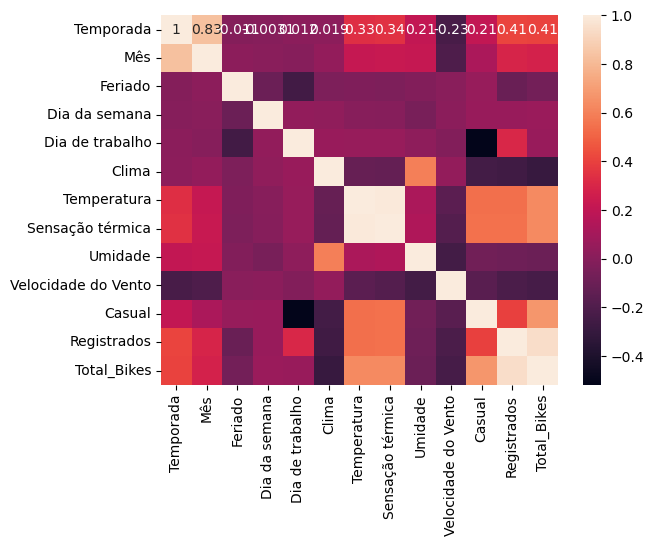

In [31]:
sns.heatmap(df_corr.corr(), annot = True)

Aplicando o heatmap com o método de Spearman

C:\Users\marce\AppData\Local\Temp\ipykernel_24416\3755665838.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(method= 'spearman'), annot = True)


<Axes: >

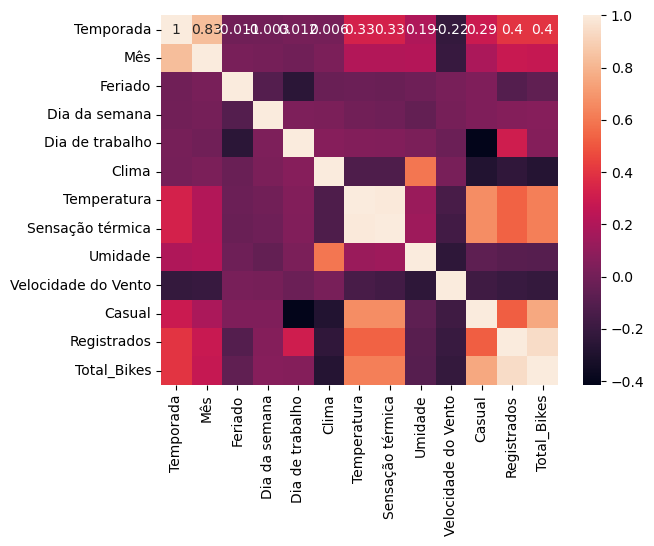

In [32]:
sns.heatmap(df_corr.corr(method= 'spearman'), annot = True)

Considerações:
* Tanto na análise de correlação de pearson quanto a de spearman indicam que tanto a temperatura quanto a sensação térmica influenciam no uso de bicicletas 

##### 6.2 Utilizando o método PPS (Predictive Power Score - Pontuação de Poder Preditivo)

Criação da matriz de PPScore de todo o dataset

In [33]:
matrix_pps = pps.matrix(df_corr)
matrix_pps

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Data,Data,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Data,Temporada,0.000000,feature_is_id,True,None,0.000000,0.000000,None
2,Data,Ano,0.000000,feature_is_id,True,None,0.000000,0.000000,None
3,Data,Mês,0.000000,feature_is_id,True,None,0.000000,0.000000,None
4,Data,Feriado,0.000000,feature_is_id,True,None,0.000000,0.000000,None
...,...,...,...,...,...,...,...,...,...
220,Total_Bikes,Umidade,0.000000,regression,True,mean absolute error,0.116434,0.153643,DecisionTreeRegressor()
221,Total_Bikes,Velocidade do Vento,0.000000,regression,True,mean absolute error,0.060702,0.080512,DecisionTreeRegressor()
222,Total_Bikes,Casual,0.074592,regression,True,mean absolute error,506.383037,468.610697,DecisionTreeRegressor()
223,Total_Bikes,Registrados,0.628836,regression,True,mean absolute error,1263.709986,469.044020,DecisionTreeRegressor()


Filtrar apenas as relações com a variável alvo

In [34]:
pps_alvo = matrix_pps[matrix_pps['y'] == 'Total_Bikes']
pps_alvo

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
14,Data,Total_Bikes,0.000000,feature_is_id,True,None,0.000000,0.000000,None
29,Temporada,Total_Bikes,0.178853,regression,True,mean absolute error,1581.454172,1298.606520,DecisionTreeRegressor()
44,Ano,Total_Bikes,0.155137,regression,True,mean absolute error,1581.454172,1336.112154,DecisionTreeRegressor()
59,Mês,Total_Bikes,0.163606,regression,True,mean absolute error,1581.454172,1322.718057,DecisionTreeRegressor()
74,Feriado,Total_Bikes,0.001195,regression,True,mean absolute error,1581.454172,1579.564616,DecisionTreeRegressor()
89,Dia da semana,Total_Bikes,0.000000,regression,True,mean absolute error,1581.454172,1600.977581,DecisionTreeRegressor()
104,Dia de trabalho,Total_Bikes,0.000000,regression,True,mean absolute error,1581.454172,1582.873775,DecisionTreeRegressor()
119,Clima,Total_Bikes,0.056168,regression,True,mean absolute error,1581.454172,1492.627276,DecisionTreeRegressor()
134,Temperatura,Total_Bikes,0.044871,regression,True,mean absolute error,1581.454172,1510.492162,DecisionTreeRegressor()
149,Sensação térmica,Total_Bikes,0.010464,regression,True,mean absolute error,1581.454172,1564.906324,DecisionTreeRegressor()


Considerações: 
* O PPScore indica que o mês tem um poder preditivo maior que a temperatura assim como a temporada

Variáveis que possuem valor maior que 0.05 em relação ao Total_Bikes

In [35]:
selected_variables = pps_alvo[pps_alvo['ppscore'] > 0.05]['x'].tolist()
selected_variables

['Temporada', 'Ano', 'Mês', 'Clima', 'Casual', 'Registrados', 'Total_Bikes']

Considerações:
* O clima, o Mês e a temporada parecem ter um valor mais significativo para poder indicar o volume total de aluguéis de bike

#### 7. Aplicando modelos de regressão linear

Modelos escolhidos:

- Regressão linear
- Lasso
- Elastic Net
- Regressão Ridge

##### 7.1 Bibliotecas dos modelos e de avaliações

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### 7.2 Tratamento dos dados e separação de treino e teste

In [37]:
df_modelos = df_traduzido.drop(columns=['Data','Ano'])

Tratando os meses

In [38]:
df_modelos['Temporada'] = df_traduzido['Temporada'].replace({'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4})

Separação entre treino e teste

In [39]:
X = df_modelos.drop(columns = 'Total_Bikes')
y = df_modelos['Total_Bikes']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)

##### 7.3 Avaliando modelos

##### 7.3.1 Regressão Linear - Simples

Grid de parâmetros para o modelo

In [40]:
param_grid_linear = {
}

Inicio do modelo linear - Simples

In [41]:
modelo_linear= LinearRegression(
   fit_intercept=False   
)

Configurar o GridSearchCV

In [42]:
grid_search_modelo_linear = GridSearchCV(estimator=modelo_linear, param_grid=param_grid_linear, cv=5)

Fit para treino

In [43]:
grid_search_modelo_linear.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=LinearRegression(fit_intercept=False),
             param_grid={})

Verificação dos melhores parâmetros do grid

In [44]:
grid_search_modelo_linear.best_estimator_

LinearRegression(fit_intercept=False)

Predição

In [45]:
y_preditoLinear_EN = grid_search_modelo_linear.predict(X_teste)

Calcular erro quadrático médio

In [46]:
mse = mean_squared_error(y_teste, y_preditoLinear_EN)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 8.685472763490571e-24


Calcular erro absoluto médio

In [47]:
mae = mean_absolute_error(y_teste, y_preditoLinear_EN)
print(f'Erro absoluto médio: {mae}')

Erro absoluto médio: 2.544685550711453e-12


Calcular R²

In [48]:
r2 = r2_score(y_teste, y_preditoLinear_EN)
print(f'R²: {r2}')

R²: 1.0


Adicionando ruido para alterações no dados de teste e validar um outro cenário contornando o possível overfitting gerado no fit anterior. 

In [49]:
y_preditoLinear_EN_ruidoso = y_preditoLinear_EN + np.random.normal(0, 0.1, y_preditoLinear_EN.shape)

Print do R2 com ruído.

In [50]:
r2_ruidoso = r2_score(y_teste, y_preditoLinear_EN_ruidoso)
print(f'R² com ruído: {r2_ruidoso}')

R² com ruído: 0.9999999972005724


##### 7.3.2 Lasso

Definir a grade de parâmetros para Lasso

In [51]:
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

Inicializar o modelo Lasso

In [52]:
lasso = Lasso()

Configurar o GridSearchCV

In [53]:
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5)

Fit para treino

In [54]:
grid_search_lasso.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]})

Melhor alpha encontrado

In [55]:
print(f'Melhor alpha para Lasso: {grid_search_lasso.best_params_}')
print(f'Melhor pontuação: {grid_search_lasso.best_score_}')

Melhor alpha para Lasso: {'alpha': 0.1}
Melhor pontuação: 0.9999999999949258


Verificação dos melhores parâmetros do grid

In [56]:
grid_search_lasso.best_estimator_

Lasso(alpha=0.1)

Regressão Lasso

In [57]:
y_preditoLasso_EN = grid_search_lasso.predict(X_teste)

Calcular erro quadrático médio

In [58]:
mse = mean_squared_error(y_teste, y_preditoLasso_EN)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 3.655385720998871e-05


Calcular erro absoluto médio

In [59]:
mae = mean_absolute_error(y_teste, y_preditoLasso_EN)
print(f'Erro absoluto médio: {mae}')

Erro absoluto médio: 0.004649057244893936


Calcular R²

In [60]:
r2 = r2_score(y_teste, y_preditoLasso_EN)
print(f'R²: {r2}')

R²: 0.9999999999908841


##### 7.3.3 Elastic Net

Grid de parâmetros para o modelo

In [61]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8]
}

Montagem do modelo

In [62]:
modelo_elastic = GridSearchCV(ElasticNet(),
                                param_grid,
                                scoring= 'accuracy',
                                n_jobs = -1)

Fit com os dados de treino

In [63]:
modelo_elastic.fit(X_treino, y_treino)

c:\Users\marce\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8]},
             scoring='accuracy')

Verificação dos melhores parâmetros do grid

In [64]:
modelo_elastic.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.2)

Regressão

In [65]:
y_predito_EN = modelo_elastic.predict(X_teste)

Calcular erro quadrático médio

In [66]:
mse = mean_squared_error(y_teste, y_predito_EN)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 1.4683596968653836e-07


Calcular erro absoluto médio

In [67]:
mae = mean_absolute_error(y_teste, y_predito_EN)
print(f'Erro absoluto médio: {mae}')

Erro absoluto médio: 0.000293591522784371


Calcular R²

In [68]:
r2 = r2_score(y_teste, y_predito_EN)
print(f'R²: {r2}')

R²: 0.9999999999999634


##### 7.3.4 Regressão Ridge

Grid de parâmetros para o modelo

In [69]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['svd','cholesky','lsqr', 'sparse_cg', 'sag', 'saga']
}

Montagem do modelo

In [70]:
modelo_ridge = GridSearchCV(Ridge(),
                                param_grid,
                                scoring= 'accuracy',
                                n_jobs = -1)

Fit com os dados de treino

In [71]:
modelo_ridge.fit(X_treino, y_treino)

c:\Users\marce\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='accuracy')

Verificação dos melhores parâmetros do grid

In [72]:
modelo_ridge.best_estimator_

Ridge(alpha=0.1, solver='svd')

Regressão

In [73]:
y_predito_Ridge = modelo_elastic.predict(X_teste)

Calcular erro quadrático médio

In [74]:
mse = mean_squared_error(y_teste, y_predito_Ridge)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 1.4683596968653836e-07


Calcular erro absoluto médio

In [75]:
mae = mean_absolute_error(y_teste, y_predito_Ridge)
print(f'Erro absoluto médio: {mae}')

Erro absoluto médio: 0.000293591522784371


Calcular R²

In [76]:
r2 = r2_score(y_teste, y_predito_Ridge)
print(f'R²: {r2}')

R²: 0.9999999999999634


#### 8. Conclusão

# Antes das alterações - Abaixo

1) Carregar e ler arquivos .csv, xlsx ou de um banco de dados;
2) Avaliar a necessidade da transformação da variável em outra escala (agrupar idade por faixas, por exemplo);
3) Realizar a codificação das variáveis categóricas de acordo com os valores das variáveis (label encoder, one hot encoder ou target encoder);
4) Normalizar as variáveis;
5) Avaliar a necessidade de realizar o balanceamento da variável alvo;
6) Tratar variáveis com alta correlação;
7) Realizar a seleção de variáveis;
8) Aplicar um modelo de regressão ou classificação utilizando uma técnica de hiperparametrização automática;
9) Aplicar uma medida de avaliação do modelo.
10) Gerar uma visualização para o resultado de acordo com os tipos abaixo:
    - Agrupamento: gerar a visualização Scatter;
    - Classificação: gerar a matriz de confusão; 
    - Regressão: gerar a visualização da linha de saída.

### Leitura dos dados

In [ ]:
# Somente rodar se necessário
# Descomente a linha a baixo para rodar!
# %pip install locale
# %pip install statsmodels
# %pip install googletrans==4.0.0-rc1

In [ ]:
#IMPORT E INSTALL AS BIBLIOTECAS IMPORTANTES
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from googletrans import Translator # Precisa do pacote do pip install
import locale # Precisa do pacote do pip install
from matplotlib.ticker import FuncFormatter
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
caminho = 'Data/Bike-day.csv'
df = pd.read_csv(caminho)

### Tratamento dos dados

#### Tradução 

In [ ]:
def traduzir_colunas(df, language='pt'):
    #Dicionario para as palavras que não foram traduzidas ou que foram traduzidas erroneamente 
    erro_ao_traduzir = {
        'dteday': 'Data',
        'mnth': 'Mês',
        'weathersit': 'Clima',
        'temp': 'Temperatura',
        'hum': 'Umidade',
        'windspeed': 'Velocidade do Vento',
        'registered': 'Registrados',
        'cnt': 'Total_Bikes',
        'atemp': 'Sensação térmica'
    }
    
    # Renomear as colunas
    traducoes = {}
    tradutor = Translator()
    for coluna in df.columns:
        try:
            if coluna in erro_ao_traduzir:
                traducoes[coluna] = erro_ao_traduzir[coluna] # Utilize a tradução personalizada
            else:
                traduzido = tradutor.translate(coluna, src='en', dest=language) # Tradução acontece aqui
                if traduzido and traduzido.text:
                    capslock = traduzido.text.capitalize() # Maiúscula na primeira letra de cada palavra

                    traducoes[coluna] = capslock
                else:
                    print(f"Erro ao traduzir a coluna '{coluna}': tradução retornou None ou texto vazio")
                    traducoes[coluna] = coluna # Manter o nome original em caso de erro
        except Exception as a:
            print(f"Erro ao traduzir a coluna '{coluna}': {a}")
            traducoes[coluna] = coluna # Manter o nome original em caso de erro

    df.columns = [traducoes.get(col, col) for col in df.columns]

In [ ]:
#EXECUTA A FUNÇÃO DE TRADUÇÃO
df_traduzido = df.copy()
traduzir_colunas(df_traduzido)
df_traduzido.head(5)

In [ ]:
#REMOVE O INDEXADOR DA PLANILHA
df_traduzido = df_traduzido.drop(columns=['Instante'])
df_traduzido.head(5)

In [ ]:
#RENOMEANDO OS VALORES NUMERICOS PARA ESTAÇÕES DO ANO (season : season (1:winter, 2:spring, 3:summer, 4:fall)) e Ano  (yr : year (0: 2011, 1:2012))

if 'Temporada' in df_traduzido.columns:
        df_traduzido['Temporada'] = df_traduzido['Temporada'].replace({1: 'Inverno', 2: 'Primavera', 3: 'Verão', 4: 'Outono'})

if 'Ano' in df_traduzido.columns:
        df_traduzido['Ano'] = df_traduzido['Ano'].replace({0: '2011', 1: '2012'})
df_traduzido.head(5)

#### Informações gerais do dataset

In [ ]:
df_traduzido.describe()

In [ ]:
df_traduzido.info()

### Análise Descritiva dos dados

Gerar tabelas sobre o data set: (gráfico de barras, colunas, linha, etc)

- relação mês x aluguel - guzinho
- relação temperatura x aluguel - guzinho

- concorrência de casual x registrado - vitinho
- Qual é o impacto dos dias úteis e feriados no uso de bicicletas? - vitinho

#### Relação season x aluguel - Allan

In [ ]:
# Gerando o gráfico de análise descritiva
contador_temporada_X_Aluguel = df_traduzido.groupby('Temporada')['Total_Bikes'].sum()

plt.figure(figsize=(8, 5))
contador_temporada_X_Aluguel.plot(kind='bar', color='skyblue')
plt.title('Total de Aluguel de Bicicletas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de Aluguel (Contador)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Mostrar o gráfico
plt.show()

In [ ]:
# Identificar as top temporadas com o maior número de aluguéis
top_temporadas = contador_temporada_X_Aluguel.sort_values(ascending=False).head(4)
for i, (temporada, total) in enumerate(top_temporadas.items(), start=1):
    print(f'Top {i}: {temporada} com {total} aluguéis')

## Relação Mês x Aluguel - Gustavo

In [ ]:
def format_func(value, tick_number):
    return locale.format_string('%.0f', value, grouping=True)

In [ ]:
locale.setlocale(locale.LC_ALL, 'de_DE.UTF-8')
formatter = FuncFormatter(format_func)

BikesPorMes = df_traduzido.groupby('Mês')['Total_Bikes'].sum()
months_dict = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}
y_labels = [f'{month_num} - {months_dict[month_num]}' for month_num in BikesPorMes.index]


plt.figure(figsize=(18, 7))
BikesPorMes.plot(kind='barh', color='#DC143C')
plt.title('Total de Aluguel de Bicicletas por Mês')
plt.xlabel('Quantidade de alugueis realizados')
plt.ylabel('Mês')
plt.xticks(rotation=0)
plt.grid(axis='x', color='#4B0082', linestyle='dashed', linewidth=2, alpha=0.65)
plt.gca().invert_yaxis()
plt.yticks(ticks=range(len(BikesPorMes)), labels=y_labels, weight='bold')
plt.gca().xaxis.set_major_formatter(formatter)


for tick in plt.gca().get_xticklabels():
    tick.set_weight('bold')

for index, value in enumerate(BikesPorMes):
    plt.text(value, index, locale.format_string('%.0f', value, grouping=True), color='black', va='center', weight='bold')

plt.show()
BikesPorMes

## Relação Temperatura x Aluguel ECDF - Gustavo

In [ ]:
bikes = df_traduzido.groupby('Mês')['Total_Bikes'].sum()
TemperaturaPorMes = df_traduzido.groupby('Mês')['Temperatura'].mean()
BikesPorTemperatura = df_traduzido.groupby('Temperatura')['Total_Bikes'].sum()
BikesTemperaturaMensal = pd.merge(TemperaturaPorMes, bikes, on='Mês', how='left')
BikesPorTemperatura


In [ ]:
ecdf = ECDF(BikesPorTemperatura)

# Plot the ECDF
plt.plot(ecdf.x, ecdf.y, marker='o', linestyle='-')
plt.xlabel('ECDF')
plt.ylabel('Temperatura')
plt.title('ECDF Plot of Bikes vs Temperatura')
plt.grid(True)
plt.show()

### Análise de correlação de variáveis

In [ ]:
df_corr = df_traduzido
df_corr['Temporada'] = df_corr['Temporada'].replace({'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4})

In [ ]:
sns.heatmap(df_corr.corr(), annot = True)

In [ ]:
sns.heatmap(df_corr.corr(method= 'spearman'), annot = True)

In [ ]:
# Criação da matriz de ppscore de todo o dataset
matrix_pps = pps.matrix(df_corr)
matrix_pps

In [ ]:
# Filtrar apenas as relações com a variável alvo
pps_alvo = matrix_pps[matrix_pps['y'] == 'Total_Bikes']
pps_alvo

In [ ]:
# Varáveis que possuem valor maior que 0.05 em relação ao Total_Bikes
selected_variables = pps_alvo[pps_alvo['ppscore'] > 0.05]['x'].tolist()
selected_variables

## Modelos de Regressão Linear

- Regressão linear - murilo
- Lasso - murilo
- Elastic Net
- Regressão Ridge

#### Bibliotecas dos modelos e de avaliações

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Tratamento dos dados e separação de treino e teste

In [ ]:
df_modelos = df_traduzido.drop(columns=['Data','Ano'])

In [ ]:
df_modelos['Temporada'] = df_traduzido['Temporada'].replace({'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4})

In [ ]:
# Separação dos dados de treino e testes
X = df_modelos.drop(columns = 'Total_Bikes')
y = df_modelos['Total_Bikes']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)

#### Regressão linear

In [ ]:
# Teste de alteração de dados da fit para regressão linear simples.
# X = df_modelos.drop(columns = 'Total_Bikes')
# y = df_modelos['Total_Bikes']
# X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.6, random_state=42)

In [ ]:
# Grid de parâmetros para o modelo
param_grid_linear = {
}

In [ ]:
# Inicio do modelo linearSimples
modelo_linear= LinearRegression(
   fit_intercept=False   
)

In [ ]:
# Configurar o GridSearchCV
grid_search_modelo_linear = GridSearchCV(estimator=modelo_linear, param_grid=param_grid_linear, cv=5)

In [ ]:
# Fit para treino
grid_search_modelo_linear.fit(X_treino, y_treino)

In [ ]:
# Verificação dos melhores parâmetros do grid
grid_search_modelo_linear.best_estimator_

In [ ]:
# Regressão Lienar Simples
y_preditoLinear_EN = grid_search_modelo_linear.predict(X_teste)

In [ ]:
# Calcular MSE
mse = mean_squared_error(y_teste, y_preditoLinear_EN)
print(f'Erro quadrático médio: {mse}')

In [ ]:
# Calcular MAE
mae = mean_absolute_error(y_teste, y_preditoLinear_EN)
print(f'Erro absoluto médio: {mae}')

In [ ]:
# Calcular R²
r2 = r2_score(y_teste, y_preditoLinear_EN)
print(f'R²: {r2}')

In [ ]:
# Adicionando ruido para alterações no dados de teste e validar um outro cenário contornando o possível overfitting gerado no fit anterior. 
y_preditoLinear_EN_ruidoso = y_preditoLinear_EN + np.random.normal(0, 0.1, y_preditoLinear_EN.shape)


In [ ]:
# Print do R2 com ruído.
r2_ruidoso = r2_score(y_teste, y_preditoLinear_EN_ruidoso)
print(f'R² com ruído: {r2_ruidoso}')

#### Lasso

In [ ]:
# Definir a grade de parâmetros para Lasso
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

In [ ]:
# Inicializar o modelo Lasso
lasso = Lasso()

In [ ]:
# Configurar o GridSearchCV
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5)

In [ ]:
# Fit para treino
grid_search_lasso.fit(X_treino, y_treino)

In [ ]:
# Melhor alpha encontrado
print(f'Melhor alpha para Lasso: {grid_search_lasso.best_params_}')
print(f'Melhor pontuação: {grid_search_lasso.best_score_}')

In [ ]:
# Verificação dos melhores parâmetros do grid
grid_search_lasso.best_estimator_

In [ ]:
# Regressão Lasso
y_preditoLasso_EN = grid_search_lasso.predict(X_teste)

In [ ]:
# Calcular MSE
mse = mean_squared_error(y_teste, y_preditoLasso_EN)
print(f'Erro quadrático médio: {mse}')

In [ ]:
# Calcular MAE
mae = mean_absolute_error(y_teste, y_preditoLasso_EN)
print(f'Erro absoluto médio: {mae}')

In [ ]:
# Calcular R²
r2 = r2_score(y_teste, y_preditoLasso_EN)
print(f'R²: {r2}')

#### Elastic Net

In [ ]:
# Grid de parâmetros para o modelo
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.2, 0.4, 0.5, 0.6, 0.8]
}

In [ ]:
# Montagem do modelo
modelo_elastic = GridSearchCV(ElasticNet(),
                                param_grid,
                                scoring= 'accuracy',
                                n_jobs = -1)

In [ ]:
# Fit com os dados de treino
modelo_elastic.fit(X_treino, y_treino)

In [ ]:
# Verificação dos melhores parâmetros do grid
modelo_elastic.best_estimator_

##### Validação do modelo

Matriz de confusão e Score de acurácia

In [ ]:
# Regressão
y_predito_EN = modelo_elastic.predict(X_teste)

In [ ]:
# Calcular MSE
mse = mean_squared_error(y_teste, y_predito_EN)
print(f'Erro quadrático médio: {mse}')

In [ ]:
# Calcular MAE
mae = mean_absolute_error(y_teste, y_predito_EN)
print(f'Erro absoluto médio: {mae}')

In [ ]:
# Calcular R²
r2 = r2_score(y_teste, y_predito_EN)
print(f'R²: {r2}')

#### Regressão Ridge

In [ ]:
# Grid de parâmetros para o modelo
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['svd','cholesky','lsqr', 'sparse_cg', 'sag', 'saga']
}

In [ ]:
# Montagem do modelo
modelo_ridge = GridSearchCV(Ridge(),
                                param_grid,
                                scoring= 'accuracy',
                                n_jobs = -1)

In [ ]:
# Fit com os dados de treino
modelo_ridge.fit(X_treino, y_treino)

In [ ]:
# Verificação dos melhores parâmetros do grid
modelo_ridge.best_estimator_

##### Validação do modelo

Matriz de confusão e Score de acurácia

In [ ]:
# Regressão
y_predito_Ridge = modelo_elastic.predict(X_teste)

In [ ]:
# Calcular MSE
mse = mean_squared_error(y_teste, y_predito_Ridge)
print(f'Erro quadrático médio: {mse}')

In [ ]:
# Calcular MAE
mae = mean_absolute_error(y_teste, y_predito_Ridge)
print(f'Erro absoluto médio: {mae}')

In [ ]:
# Calcular R²
r2 = r2_score(y_teste, y_predito_Ridge)
print(f'R²: {r2}')

##### Impacto das Condições Climáticas (Clima, Temperatura, Umidade, Velocidade do Vento) - Vitinho

In [ ]:
# Impacto da Temperatura no Uso
# Plotar o gráfico de dispersão com regressão e intervalo de confiança
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Clima')
plt.show()


In [ ]:
# Impacto da Temperatura no Uso
# Plotar o gráfico de dispersão com regressão e intervalo de confiança
# Em dias de trabalho

df_traduzido_sem_feriado = df_traduzido[df_traduzido ['Dia de trabalho'] != 0]
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido_sem_feriado, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados - Em dias de trabalho')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Clima')
plt.show()

In [ ]:
# Impacto da Temperatura no Uso
# Plotar o gráfico de dispersão com regressão e intervalo de confiança
#Em feriados e fins de semana
df_traduzido_com_feriado = df_traduzido[df_traduzido ['Dia de trabalho'] == 0]
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido_com_feriado, x='Temperatura', y='Casual', alpha=0.7, label='Casual', color='blue')
sns.scatterplot(data=df_traduzido_com_feriado, x='Temperatura', y='Registrados', alpha=0.7, marker='x', label='Registrados', color='red')
sns.regplot(data=df_traduzido_com_feriado, x='Temperatura', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido_com_feriado, x='Temperatura', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Temperatura no Uso - Usuários Casuais vs Registrados - Em feriados e fins de semana')
plt.xlabel('Temperatura')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Clima')
plt.show()

In [ ]:

# Impacto da Umidade no Uso
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Umidade', y='Casual', color='blue', alpha=0.7, label='Casual')
sns.scatterplot(data=df_traduzido, x='Umidade', y='Registrados',color='red', alpha=0.7, marker='x', label='Registrados')
sns.regplot(data=df_traduzido, x='Umidade', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Umidade', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Umidade no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Umidade')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Clima')
plt.show()

In [ ]:
# Impacto da Velocidade do Vento no Uso
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_traduzido, x='Velocidade do Vento', y='Casual', color='blue', alpha=0.7, label='Casual')
sns.scatterplot(data=df_traduzido, x='Velocidade do Vento', y='Registrados',color='red', alpha=0.7, marker='x', label='Registrados')
sns.regplot(data=df_traduzido, x='Velocidade do Vento', y='Casual', scatter=False, color='blue', ci=95)
sns.regplot(data=df_traduzido, x='Velocidade do Vento', y='Registrados', scatter=False, color='red', ci=95)
plt.title('Impacto da Velocidade do Vento no Uso - Usuários Casuais vs Registrados')
plt.xlabel('Velocidade do Vento')
plt.ylabel('Número de Aluguéis')
plt.legend(title='Clima')
plt.show()